In [1]:
import ehrapy as ep
import matplotlib.pyplot as plt

In [2]:
adata = ep.dt.diabetes_130_fairlearn()
ep.ad.move_to_obs(adata, ["medicare", "race", "age", "gender"], copy_obs=True)

❗ Features 'time_in_hospital', 'num_procedures', 'number_diagnoses', 'readmit_binary' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
❗ Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


AnnData object with n_obs × n_vars = 101766 × 24
    obs: 'race', 'gender', 'age', 'medicare'
    var: 'feature_type'
    layers: 'original'

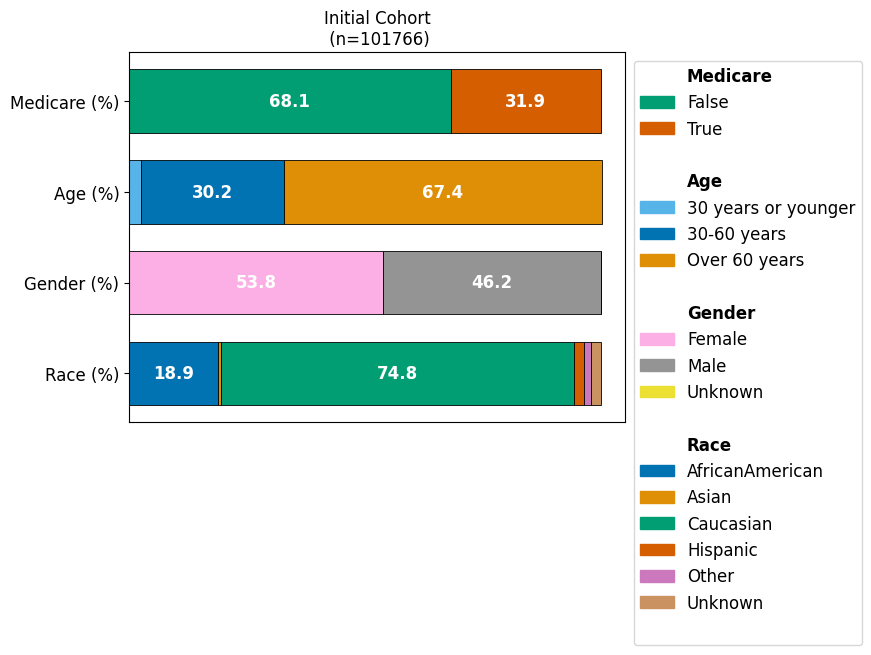

In [3]:
ct = ep.tl.CohortTracker(adata)
ct(adata, label="Initial Cohort")
ct.plot_cohort_barplot(
    subfigure_title=True,
    fontsize=12,
    yticks_labels={
        "age": "Age (%)",
        "gender": "Gender (%)",
        "race": "Race (%)",
        "medicare": "Medicare (%)",
    },
    legend_labels={
        "'30 years or younger'": "30 years or younger",
        "'30-60 years'": "30-60 years",
        "'Over 60 years'": "Over 60 years",
        "Unknown/Invalid": "Unknown",
    },
    legend_subtitles=True,
    legend_subtitles_names={
        "age": "Age",
        "gender": "Gender",
        "race": "Race",
        "medicare": "Medicare",
    },
    show=False,
)
plt.savefig("selection_filtering_bias_1.pdf", dpi=300, bbox_inches="tight")

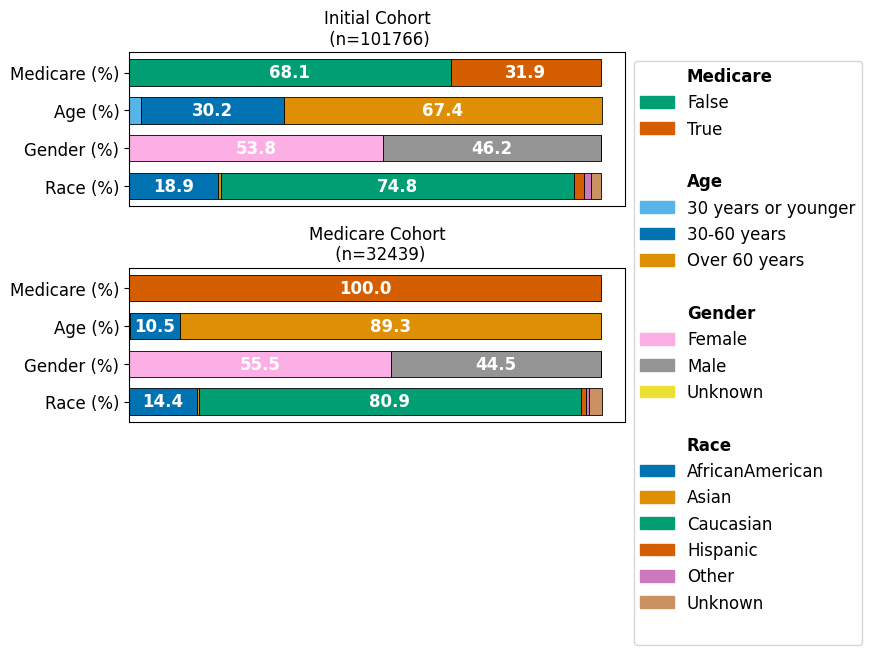

In [4]:
adata_filtered = adata[adata.obs["medicare"]].copy()
ct(adata_filtered, label="Medicare Cohort", operations_done="Filtering for Medicare")

fig, ax = ct.plot_cohort_barplot(
    subfigure_title=True,
    fontsize=12,
    yticks_labels={
        "age": "Age (%)",
        "gender": "Gender (%)",
        "race": "Race (%)",
        "medicare": "Medicare (%)",
    },
    legend_labels={
        "'30 years or younger'": "30 years or younger",
        "'30-60 years'": "30-60 years",
        "'Over 60 years'": "Over 60 years",
        "Unknown/Invalid": "Unknown",
    },
    legend_subtitles=True,
    legend_subtitles_names={
        "age": "Age",
        "gender": "Gender",
        "race": "Race",
        "medicare": "Medicare",
    },
    show=False,
)
fig.subplots_adjust(hspace=0.4)
plt.savefig("selection_filtering_bias_2.pdf", dpi=300, bbox_inches="tight")

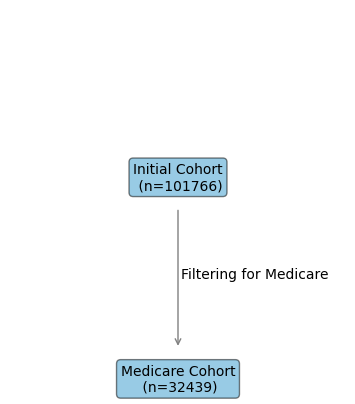

In [5]:
ct.plot_flowchart(show=False, bbox_kwargs={"fc": "#3399CC"})
plt.savefig(
    "selection_filtering_bias_3.pdf",
    dpi=300,
    bbox_inches="tight",
)